In [482]:
import numpy as np
import pandas as pd

df = pd.read_csv('../dataset/deceptive-opinion.csv')
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [483]:
df.isnull().sum()

deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

In [484]:
df['hotel'].unique()

array(['conrad', 'hyatt', 'omni', 'fairmont', 'sheraton', 'knickerbocker',
       'homewood', 'swissotel', 'ambassador', 'affinia', 'hardrock',
       'talbott', 'hilton', 'james', 'monaco', 'sofitel', 'palmer',
       'intercontinental', 'allegro', 'amalfi'], dtype=object)

<AxesSubplot:xlabel='deceptive', ylabel='count'>

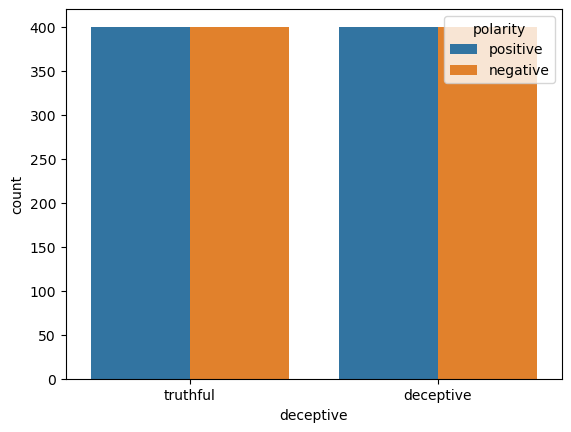

In [485]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['deceptive'], hue='polarity', data = df)

<AxesSubplot:xlabel='deceptive', ylabel='count'>

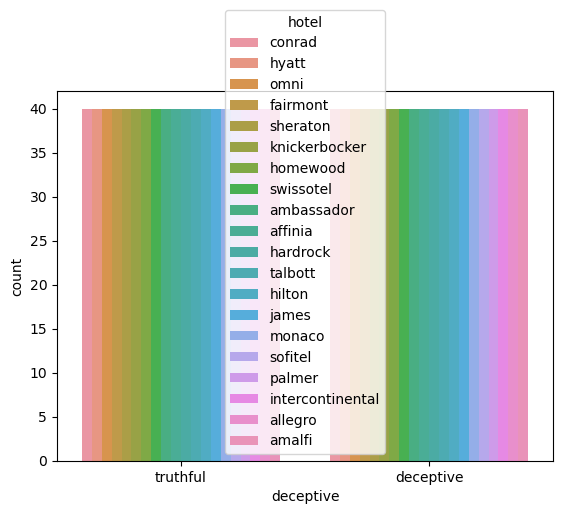

In [486]:
sns.countplot(x=df['deceptive'],hue='hotel',data=df)


In [487]:
df=df.drop(['hotel'],axis=1)


In [488]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [489]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string 
def text_cleaning(text):
    '''
        Make text lowercase, remove text in square brackets, remove link, remove special characters, 
        and remove words containing numbers.
    '''
    
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('\\W'," ", text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text


In [490]:
df['text']=df['text'].apply(text_cleaning)


In [491]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,we stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,triple a rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,this comes a little late as i m finally catchi...
3,truthful,positive,TripAdvisor,the omni chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,i asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,problems started when i booked the intercontin...
1596,deceptive,negative,MTurk,the amalfi hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,the intercontinental chicago magnificent mile ...
1598,deceptive,negative,MTurk,the palmer house hilton while it looks good i...


In [492]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,we stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,triple a rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,this comes a little late as i m finally catchi...
3,truthful,positive,TripAdvisor,the omni chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,i asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,problems started when i booked the intercontin...
1596,deceptive,negative,MTurk,the amalfi hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,the intercontinental chicago magnificent mile ...
1598,deceptive,negative,MTurk,the palmer house hilton while it looks good i...


In [493]:
df['deceptive'].unique()

array(['truthful', 'deceptive'], dtype=object)

In [494]:
sentences=df['text'].values
y=df['deceptive'].values


In [495]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y = le.fit_transform(y)

In [496]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



sentences_train, sentences_test, y_train, y_test = train_test_split(sentences,y, test_size=0.2, random_state=1000)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

x_train = tokenizer.texts_to_sequences(sentences_train)
x_test = tokenizer.texts_to_sequences(sentences_test)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100

x_train = pad_sequences(x_train, padding = 'post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding = 'post', maxlen=maxlen)


In [497]:
x_train

array([[   1,  189,  258, ...,    0,    0,    0],
       [   7,    1,  805, ...,   94,   15,   39],
       [ 670,   70,    1, ...,    1,  140,  918],
       ...,
       [  10,   32,   48, ...,   15,   20,    8],
       [  15,   46,    8, ...,   34,   15,  368],
       [ 156,    1,   99, ...,   98, 2090,  119]], dtype=int32)

In [498]:
x_train.shape

(1280, 100)

In [499]:
x_test

array([[   1,    8,   68, ...,   14,   96,  215],
       [   6,  978,    2, ...,   92, 2146,   29],
       [  22,   14,  165, ...,    7,    1,  702],
       ...,
       [  14,  175,    2, ...,   71,   63,    0],
       [  24,   36, 1454, ...,   57,  257,   63],
       [  96,   92,   26, ...,  366,  807,  123]], dtype=int32)

In [500]:
from keras.models import Sequential
from keras import layers
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, LSTM, Dense

embedding_dim = 100
from tensorflow.keras.callbacks import EarlyStopping
reg = tf.keras.regularizers.l1(0.001)
early_stop = EarlyStopping(monitor='val_loss', patience=20)

model = Sequential()

model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(256, 10, padding='valid', strides = 2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.GlobalMaxPooling1D())
# model.add(layers.Conv1D(256, 10, padding='valid', strides = 2, activation='relu'))
# model.add(layers.GlobalMaxPooling1D())

# model.add(layers.Dense(250, activation='relu'))
# model.add(layers.Dense(250)
model.add(layers.Dropout(rate = 0.5))
# model.add(layers.LSTM(128))

# model.add(Activation('relu'))
model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l1(0.007)))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=50,
                    validation_data=(x_test, y_test),
                    batch_size=10)

Epoch 1/50
128/128 [==============================] - 2s 10ms/step - loss: 0.8664 - accuracy: 0.5305 - val_loss: 0.7866 - val_accuracy: 0.5125
Epoch 2/50
128/128 [==============================] - 1s 9ms/step - loss: 0.7390 - accuracy: 0.6477 - val_loss: 0.7214 - val_accuracy: 0.6187
Epoch 3/50
128/128 [==============================] - 1s 9ms/step - loss: 0.6693 - accuracy: 0.7234 - val_loss: 0.6631 - val_accuracy: 0.6938
Epoch 4/50
128/128 [==============================] - 1s 9ms/step - loss: 0.5256 - accuracy: 0.8406 - val_loss: 0.6153 - val_accuracy: 0.7500
Epoch 5/50
128/128 [==============================] - 1s 9ms/step - loss: 0.3748 - accuracy: 0.9211 - val_loss: 0.6186 - val_accuracy: 0.7812
Epoch 6/50
128/128 [==============================] - 1s 9ms/step - loss: 0.2849 - accuracy: 0.9695 - val_loss: 0.6468 - val_accuracy: 0.7688
Epoch 7/50
128/128 [==============================] - 1s 9ms/step - loss: 0.2332 - accuracy: 0.9922 - val_loss: 0.6544 - val_accuracy: 0.7656
Epoch

In [501]:
# from keras.models import Sequential
# from keras import layers

# embedding_dims = 100
# batch_size = 32
# filters = 250
# kernel_size = 3
# hidden_dims = 250
# epochs = 50



# model = Sequential()
# model.add(layers.Conv1D(filters,kernel_size,padding = 'valid' , activation = 'relu',strides = 1 , 
#                  input_shape = (maxlen,embedding_dims)))
# model.add(layers.GlobalMaxPooling1D())
# model.add(layers.Dense(hidden_dims))
# model.add(layers.Dropout(0.2))
# model.add(layers.Activation('relu'))
# model.add(layers.Dense(1))
# model.add(layers.Activation('sigmoid'))

# model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
# model.fit(x_train,y_train,batch_size = batch_size,epochs = epochs , validation_data = (x_test,y_test))
# # model = Sequential()
# # model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
# # model.add(layers.Conv1D(256, 5, activation='relu'))
# # model.add(layers.GlobalMaxPooling1D())
# # model.add(layers.Dense(100, activation='relu'))
# # model.add(layers.Dense(1, activation='sigmoid'))
# # model.compile(optimizer='adam',
# #               loss='binary_crossentropy',
# #               metrics=['accuracy'])
# # history = model.fit(x_train, y_train,
# #                     epochs=50,
# #                     validation_data=(x_test, y_test),
# #                     batch_size=10)

Epochs = 40-60

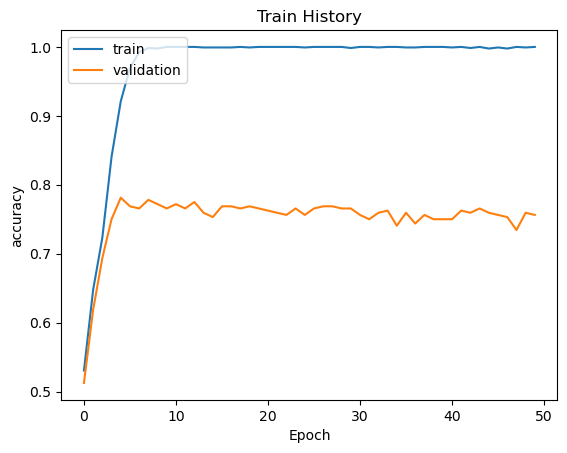

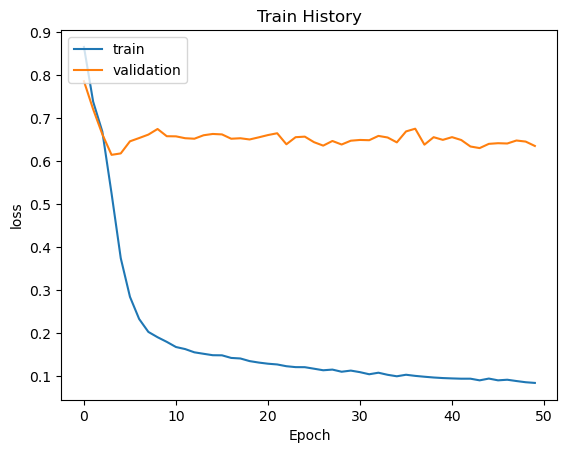

In [502]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
show_train_history(history,'accuracy','val_accuracy')
show_train_history(history,'loss','val_loss')

In [503]:
print('Training loss \t', history.history['loss'][-1]*100)
print('Training accuracy ',  history.history['accuracy'][-1]*100)
print('Validation loss ', history.history['val_loss'][-1]*100)
print('Validation accuracy ',  history.history['val_accuracy'][-1]*100)

Training loss 	 8.44966545701027
Training accuracy  100.0
Validation loss  63.59378099441528
Validation accuracy  75.62500238418579


In [504]:
new_text = "I love this hotel. The staff is very friendly. I don't think there is any places as good as this"
new_sequence = tokenizer.texts_to_sequences([new_text])
new_data = pad_sequences(new_sequence, maxlen=maxlen)
prediction = model.predict(new_data)
prediction_label = np.round(prediction[0][0])
print(prediction_label)

1/1 [==============================] - 0s 45ms/step
0.0


In [505]:
new_text = "During my holiday at Bali, I stayed at Hilton hotel. We arrived there at 12am. There was no staff. No one is coming to help us. We have to carry our luggae to the room. There was monkey everywhere. My girlfriend is afraid of monkey and she's not coming to the room. She has a terrible experience. So am I. If only we can get rid of the monkey and the staff is helpful, that would be nice. Why? because the place itself is big and the room is comfortable. The environment is good except the monkey. The service is kind of not so good."
new_sequence = tokenizer.texts_to_sequences([new_text])
new_data = pad_sequences(new_sequence, maxlen=maxlen)
prediction = model.predict(new_data)
prediction_label = np.round(prediction[0][0])
print(prediction_label)

1/1 [==============================] - 0s 15ms/step
0.0


In [506]:
new_text = "We planned to stay for 5 nights on a family trip. I booked this hotel because of the expected value for a suite as well as the free breakfast - get a quick bite, then head out for the day to do normal tourist stuff. Well, our stay here lasted 1 night and we quickly, and thankfully, switched to a different hotel for our last 4 nights. The room was dirty. When we opened the sofabed, the sheets were filthy and there was a mess of dirt and crumbs that fell out. Ridiculous considering this is a suite hotel where the sofabeds are likely used, and theoretically cleaned, a lot. Extra blankets were also dirty and bathrooms weren't much better. Temperature control in the room was imprecise - minor inconvenience but without clean blankets on our only night, it made for a cold stay. If you like to eat for free (they have free breakfasts and dinner on certain nights) and don't care to eat the great food Chicago has to offer, I guess some may find this place tolerable. But we found the buffet no better than average and felt like we were at a Golden Corral. The only thing this hotel really has going for it is location but there are other options in this area (we switched to The James and had a great experience). I couldn't be paid to stay here again. I'm shocked by the high overall rating given our experience."
new_sequence = tokenizer.texts_to_sequences([new_text])
new_data = pad_sequences(new_sequence, maxlen=maxlen)
prediction = model.predict(new_data)
prediction_label = np.round(prediction[0][0])
print(prediction_label)

1/1 [==============================] - 0s 15ms/step
0.0


In [507]:
new_text = "I had to do a little research on the Hilton brand because it's not one that I was familiar with. I wanted to know what this hotel chain's reputation was, so I did a little research online and found out that it's pretty well-known as a chain that people book into for their business trips and vacations. I also found out that this hotel chain is pretty well-reviewed by people who have stayed in their hotels."
new_sequence = tokenizer.texts_to_sequences([new_text])
new_data = pad_sequences(new_sequence, maxlen=maxlen)
prediction = model.predict(new_data)
prediction_label = np.round(prediction[0][0])
print(prediction_label)

1/1 [==============================] - 0s 16ms/step
0.0


In [508]:
from sklearn.metrics import classification_report

y_pred = np.round(model.predict(x_test).ravel())
print (classification_report(y_test, y_pred))


10/10 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       157
           1       0.79      0.71      0.75       163

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



In [509]:
predict_test = pd.DataFrame({'Test':sentences_test, 'Pred':y_pred, 'True_label':y_test}, columns=['Test','Pred','True_label'])
predict_test

,Test,Pred,True_label
0,after some deliberation i booked the sofitel w...,1.0,1
1,i was very disappointed with this hotel the f...,0.0,0
2,i choose the homewood suites in downtown chica...,0.0,1
3,we absolutely loved the knickerbocker now if...,1.0,1
4,as a frequent traveler for both business and p...,0.0,0
...,...,...,...
315,the millennium knickerbocker hotel has seen be...,0.0,0
316,we experienced bed bugs in our room while stay...,0.0,1
317,my husband and i were in the fairmont chicago ...,0.0,1
318,i was in chicago from september for a conven...,1.0,1
